In [1]:
#importing libraries needed
import pandas as pd
import numpy as np
#To plot required plots for the analysis
from matplotlib import pyplot as plt
import seaborn as sns
#To avoid any warnings in the middle importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reads the data from csv file
data=pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Finding shape of the dataframe
data.shape

(39717, 111)

In [4]:
#To know the info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#checking the percentage of missing values in dataframe
(data.isnull().sum()*100)/len(data)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

# Data Cleaning


In [6]:
#Removing the coulmns where it has all missing values
data.dropna(axis = 1, how = 'all', inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#Removing columns which has highest percentage of null values
data.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1, inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
#As observed in the dataframe there were some coulmns which has lot of single values. So removing that coulmns as they will not help for the analysis
data.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt','pub_rec_bankruptcies','tax_liens'], axis = 1, inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [9]:
#Removing irrelavent coulmns 
data.drop(['id', 'member_id','emp_title', 'url','title', 'zip_code', 'addr_state','out_prncp','total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','chargeoff_within_12_mths'], axis = 1, inplace = True)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06


In [10]:
#To know the shape of the dataframe after removing columns
data.shape

(39717, 25)

### The analysis we need do was who is more likely to be default. To analyze that we don't need Current data

In [11]:
#Removing data where loan status is current 
data.drop(data[data['loan_status'] == "Current"].index, inplace = True)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  dti                  38577 non-null 

### Univariate Analysis

In [13]:
# To know the description of each coulmn
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp_inv
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0


#### Vizulization for continuous data

<AxesSubplot:>

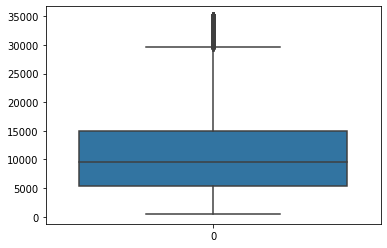

In [14]:
#plotting box plot for the loan_amnt
sns.boxplot(data['loan_amnt'])

#### Observations

Though the above plot looks good as there are some extreme values too but no need to remove them as the plot looing fine 

<AxesSubplot:>

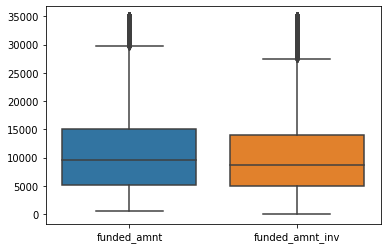

In [15]:
sns.boxplot(data=data.loc[:, ['funded_amnt','funded_amnt_inv']])

#### Observations

Above plots looks fine as there are some extreme values but no need to remove them as the plot looing fine 

<AxesSubplot:>

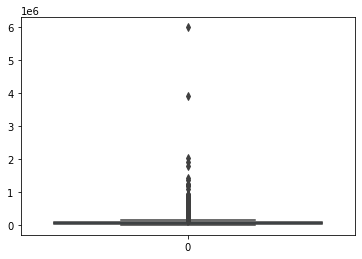

In [16]:
sns.boxplot(data['annual_inc'])

#### Observations

As we can observe there are presence of outliers. Removing them with the help of quantiles. Let's check from which quantile the variation in the data starting:

In [17]:
data.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95,0.96,0.97,0.98, 0.99,1])

0.25      40000.0
0.50      58868.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.96     150000.0
0.97     165000.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

Let's remove outliers at 0.95 quantile. So that we can look the clean data

<AxesSubplot:>

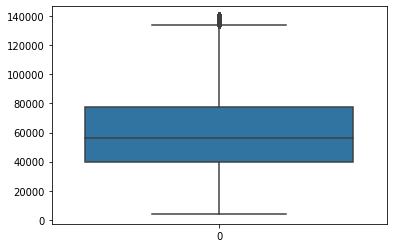

In [18]:
data=data[data['annual_inc'] < data['annual_inc'].quantile(0.95)]
sns.boxplot(data['annual_inc'])

Lets' check for other needed columns too for analysis if any outlier or not

<AxesSubplot:>

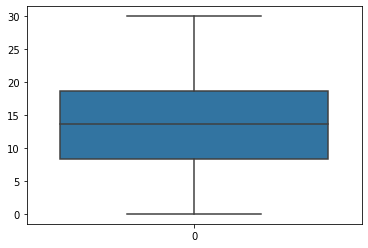

In [19]:
sns.boxplot(data['dti'])

#### Vizulization for categorical data

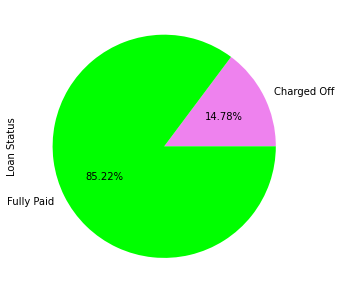

In [20]:
fig, ax = plt.subplots(figsize=(5, 6))
data.groupby('loan_status').size().plot(kind='pie',colors=['violet', 'lime'],autopct='%1.2f%%', ax=ax)
ax.set_ylabel('Loan Status', size=10)
plt.show()

As we can observe there was data which has mostly the loan status was fully paid only. 

Lets analyze data for charged off persons where our main aim is to analyze data of defaulters

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

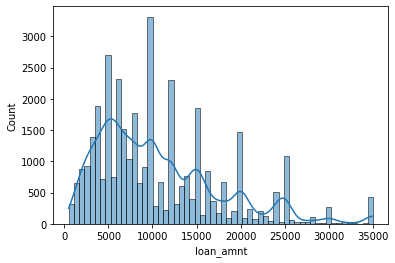

In [21]:
sns.histplot(data = data['loan_amnt'], kde = True)

In [22]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [23]:
#replacing 'NONE' values with 'OTHERS' as we have very less data with NONE
data['home_ownership'].replace('NONE','OTHER',inplace = True)
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

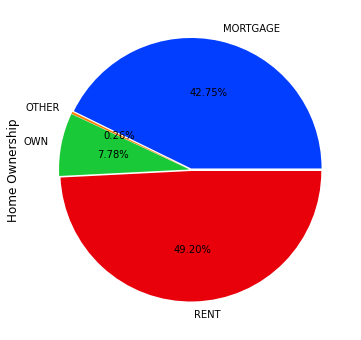

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
data.groupby('home_ownership').size().plot(kind='pie',colors=sns.color_palette('bright'),autopct='%1.2f%%', ax=ax,explode=[0.01]*4,)
ax.set_ylabel('Home Ownership', size=12)
plt.show()

##### Observations

plot shows that most of applicants are living in rented and mortgaze home.

<AxesSubplot:xlabel='term', ylabel='count'>

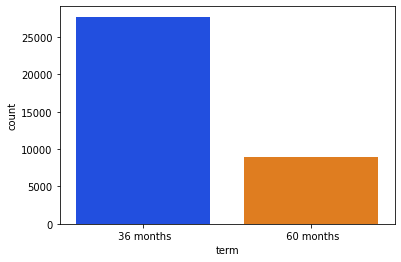

In [25]:
sns.countplot(x = data['term'], data = data[data.loan_status == 'Charged Off'], palette='bright')

#### Observations

Plot shows that charged off applicants who had applied for loan mostly 36 months. 

<AxesSubplot:xlabel='verification_status', ylabel='count'>

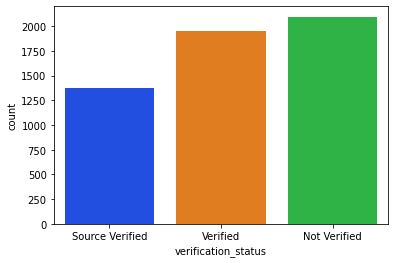

In [26]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'],palette='bright')

#### Observations

The most defaulters of the verification status was not verified only.

<AxesSubplot:xlabel='grade', ylabel='count'>

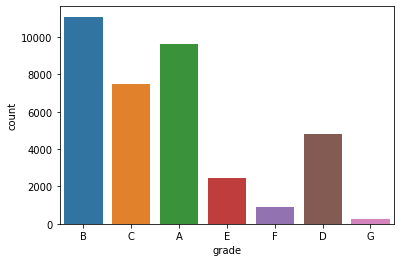

In [27]:
sns.countplot(x = data['grade'], data = data[data.loan_status == 'Charged Off'])

##### Observations

As per the plot had observed that grade 'B' has highest amount of charged off data. 

### Bivariate analysis

#### Correlation Matrix

<AxesSubplot:>

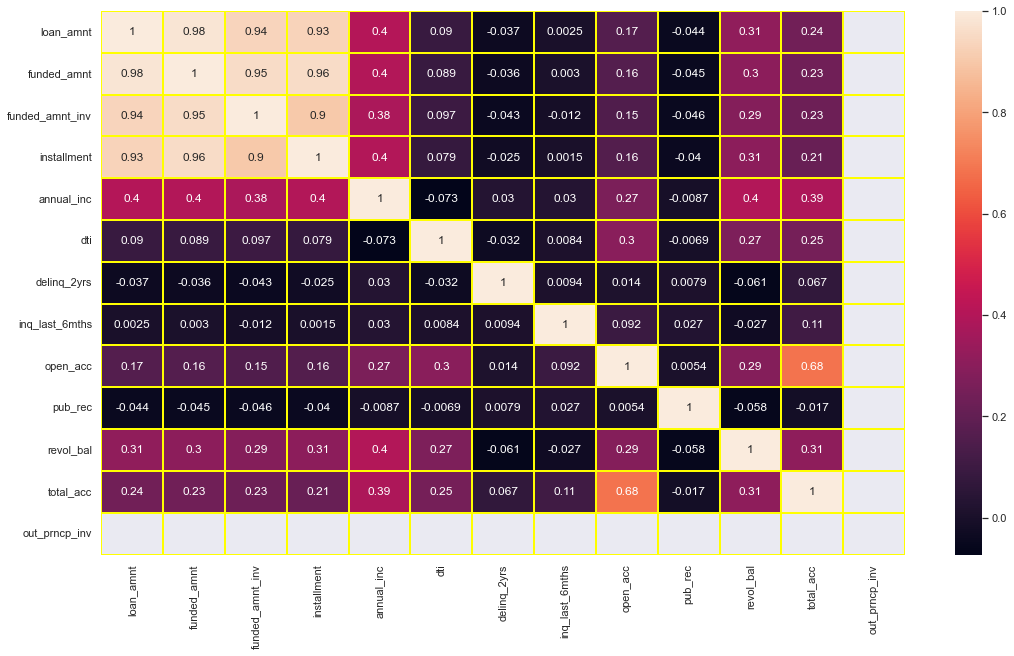

In [28]:
data_correlation = data.corr()
linewidths = 2
linecolor = "yellow"
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(data=data_correlation, annot=True, linewidths=linewidths,linecolor=linecolor)

#### Observations

As per the plot observing that loan amount,funded amount, funded_amnt_invst are positvely correlated

<AxesSubplot:xlabel='home_ownership', ylabel='annual_inc'>

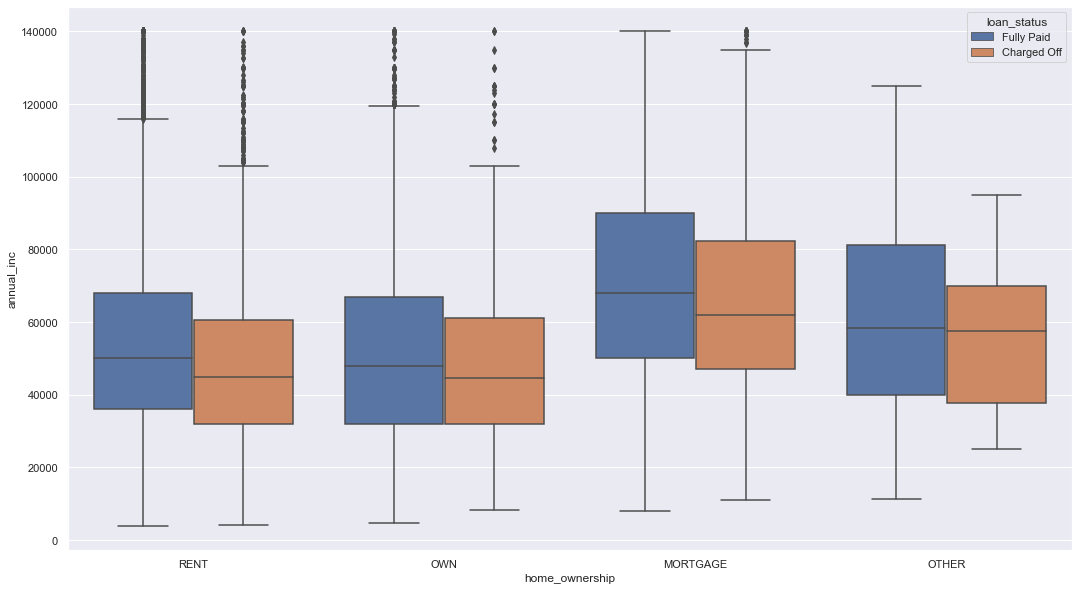

In [29]:
sns.boxplot(x =data['home_ownership'], y =data['annual_inc'], data = data,hue ='loan_status')

#### Observations

As per the plot had observed that the applicants who have higher salary mostly there were in mortaged homes.

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

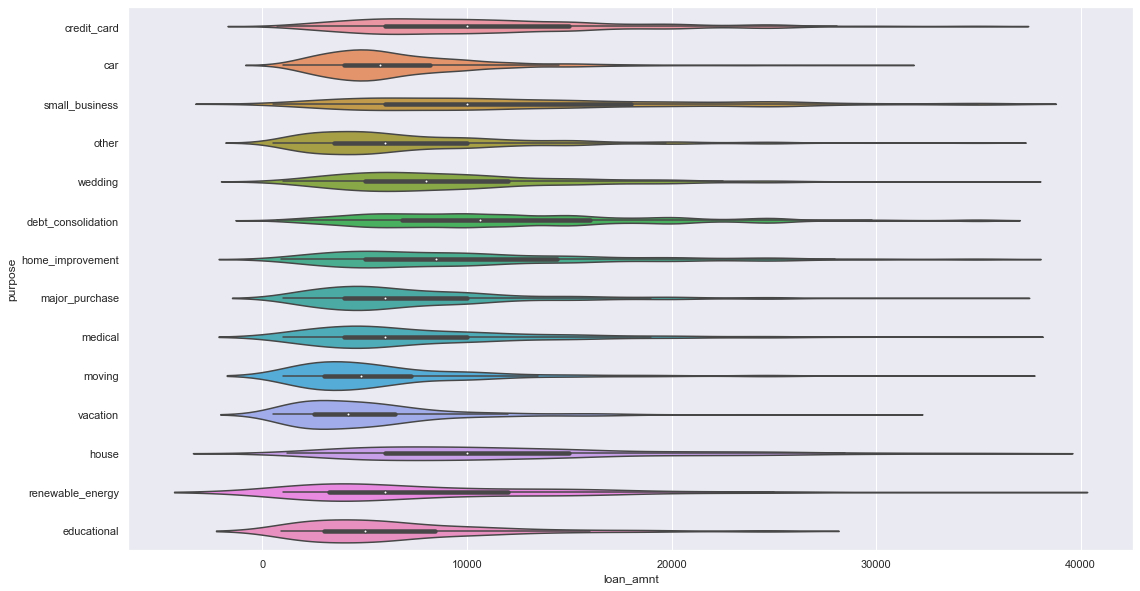

In [30]:
sns.violinplot(data =data,y='purpose', x='loan_amnt')

#### Observations

As per the plot had observed that most of the applicants had applied for loan with the reason of small business,house

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

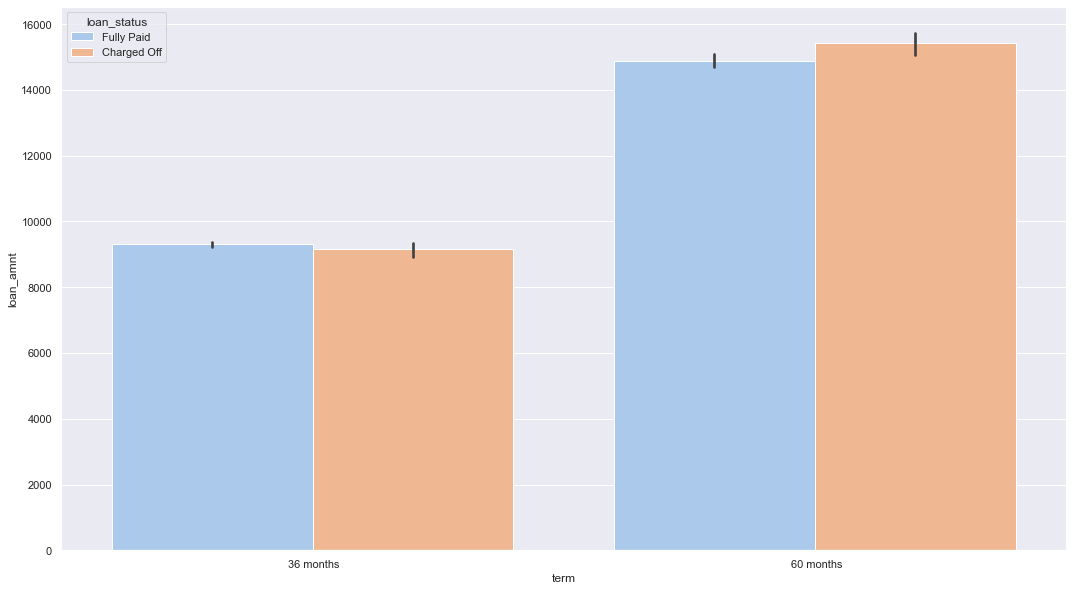

In [31]:
sns.barplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status',palette='pastel')

#### Observations

As per the plot had observed that most of the default applicants had applied for 60 months loan

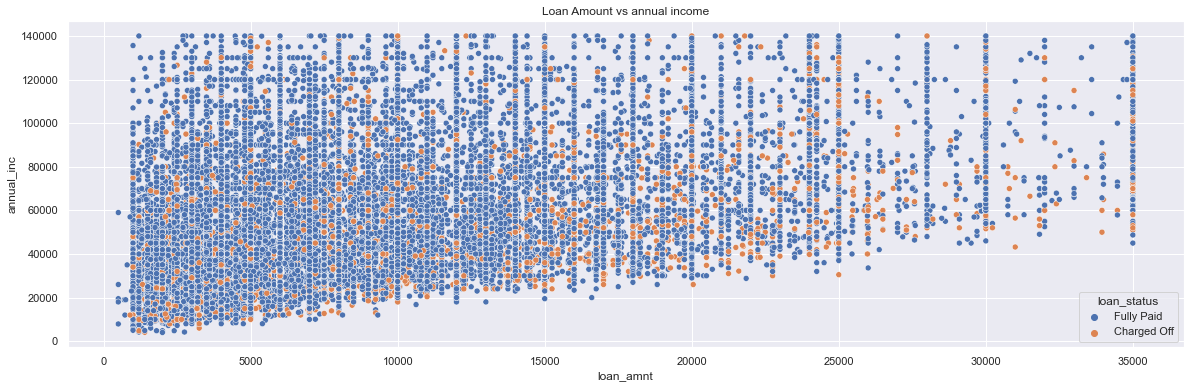

In [32]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x=data['loan_amnt'], y=data['annual_inc'], data=data, hue=data['loan_status'])
plt.title('Loan Amount vs annual income')
plt.show()

As we can observe both Fully paid and charged off borrowers loan amount and annula income there was no difference.